# Визуализация ДАННЫХ


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/GoogleApps.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up


Гистограмма

<Axes: ylabel='Frequency'>

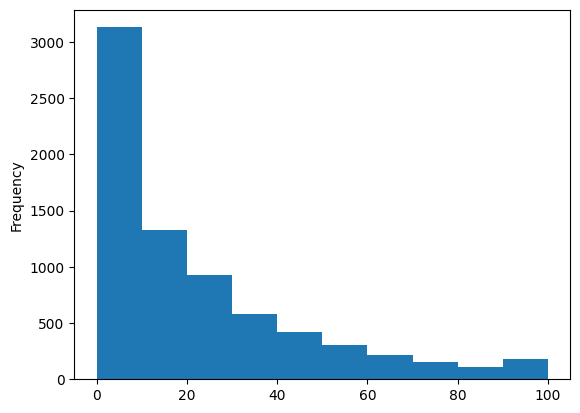

In [5]:
df['Size'].plot(kind = 'hist')

<Axes: >

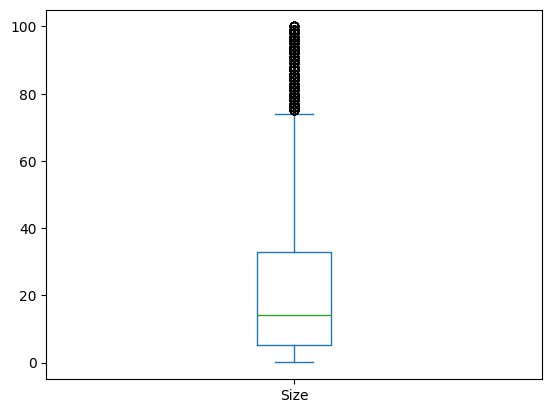

In [24]:
df['Size'].plot(kind = 'box')

In [7]:
df['Size'].agg(['min', 'max', 'mean', 'std'])

min       0.008301
max     100.000000
mean     22.769578
std      23.379472
Name: Size, dtype: float64

In [16]:
df_test = pd.Series([1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 9, 10])

<Axes: ylabel='Frequency'>

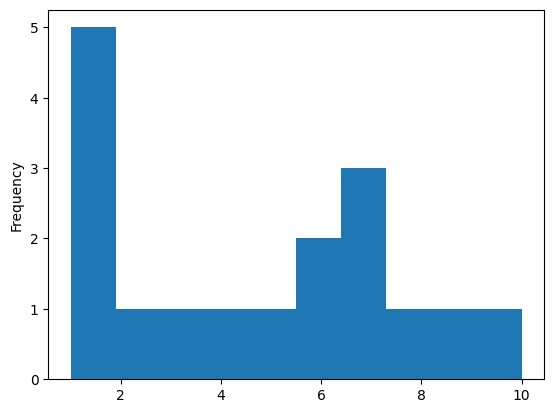

In [17]:
df_test.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

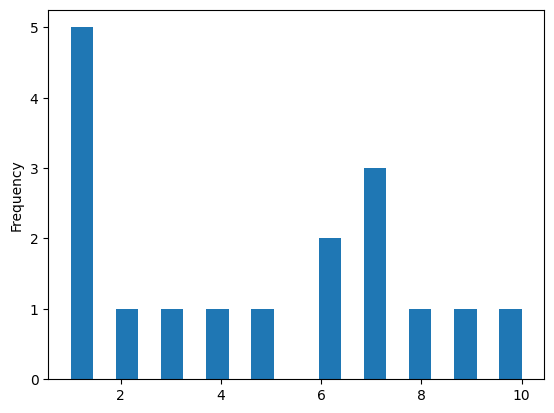

In [22]:
df_test.plot(kind = 'hist', bins=20)

<Axes: >

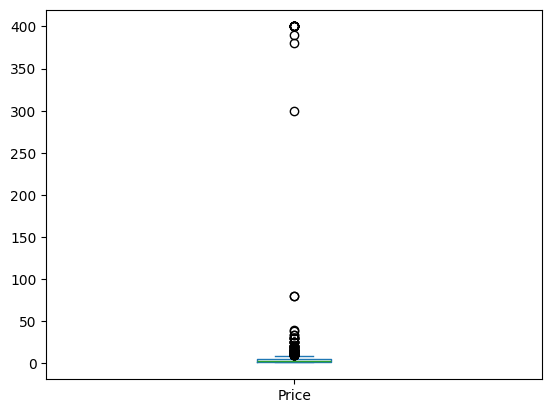

In [23]:
df[df['Type'] == 'Paid']['Price'].plot(kind = 'box')

In [26]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up


In [27]:
def make_season(data):
    data = data.split(' ')[0]
    if data in ['January', 'February', 'December']:
        return 'Winter'
    if data in ['March', 'April', 'May']:
        return 'Spring'
    if data in ['June', 'July', 'August']:
        return 'Summer'
    if data in ['September', 'October', 'November']:
        return 'Autumn'

In [28]:
df['Season'] = df['Last Updated'].apply(make_season)

In [31]:
df['Season'].value_counts()

Season
Summer    3894
Spring    1624
Winter    1028
Autumn     806
Name: count, dtype: int64

<Axes: ylabel='count'>

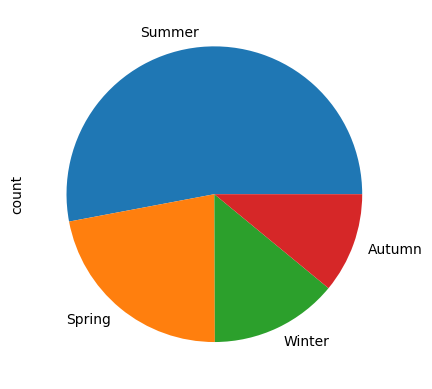

In [33]:
df['Season'].value_counts().plot(kind = 'pie')

<Axes: ylabel='count'>

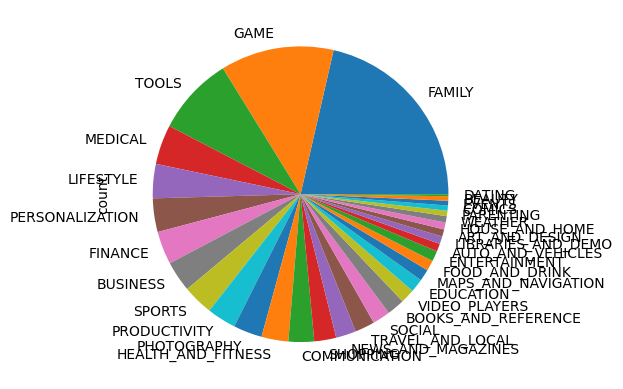

In [34]:
df['Category'].value_counts().plot(kind = 'pie')

<Axes: title={'center': 'Количество приложений по категориям'}, xlabel='Категория', ylabel='Количество'>

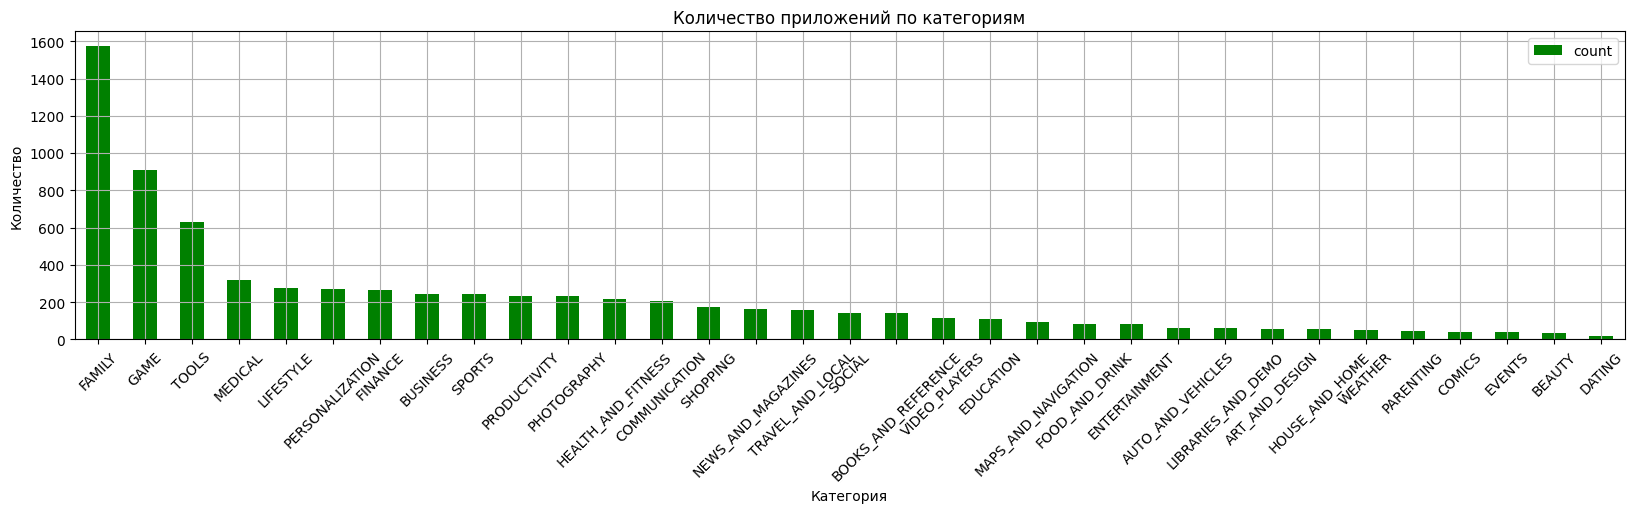

In [58]:
df['Category'].value_counts().plot(kind = 'bar', figsize = (20, 4), 
                                   grid = True, color = 'green', 
                                   title = 'Количество приложений по категориям', 
                                   fontsize = 10, rot = 45, legend = True,
                                   ylabel = 'Количество', xlabel = 'Категория')

<Axes: ylabel='Category'>

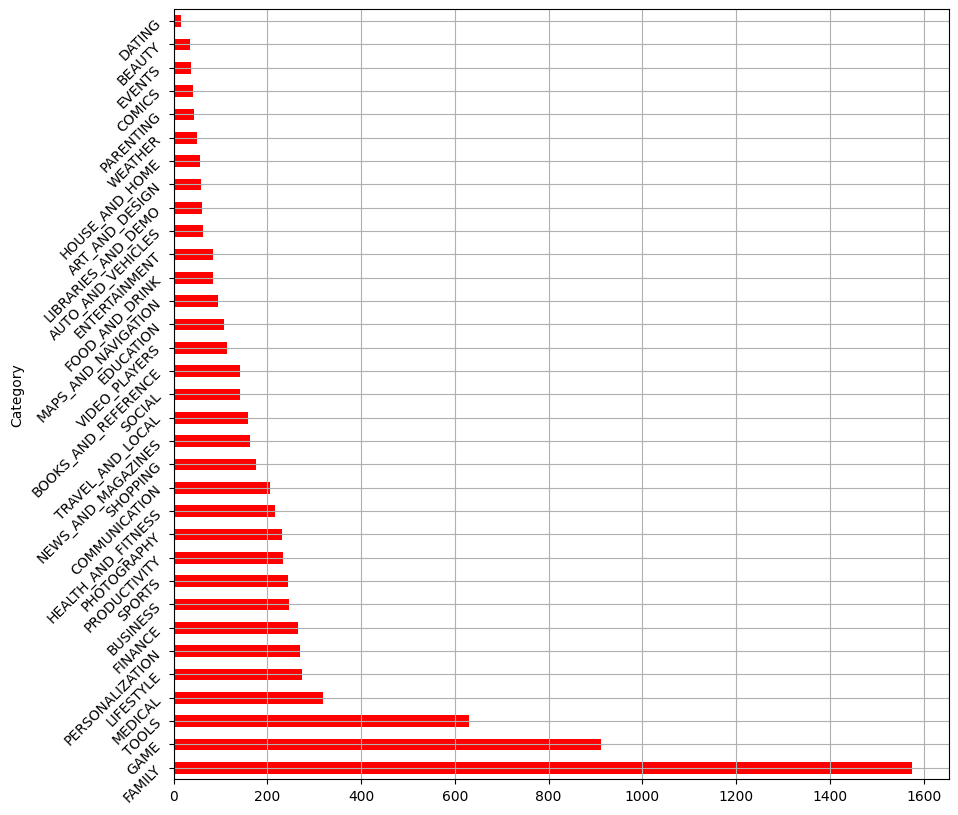

In [60]:
df['Category'].value_counts().plot(kind = 'barh', figsize = (10, 10), color = 'red', grid = True, rot = 45)

<Axes: ylabel='Content Rating'>

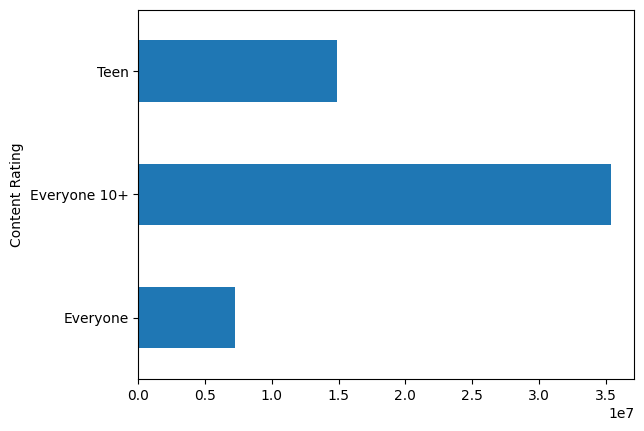

In [63]:
d1 = df[df['Type'] == 'Free'].groupby('Content Rating')['Installs'].mean()
d2 = df[df['Type'] == 'Paid'].groupby('Content Rating')['Installs'].mean()
d1.plot(kind = 'barh')

<Axes: ylabel='Content Rating'>

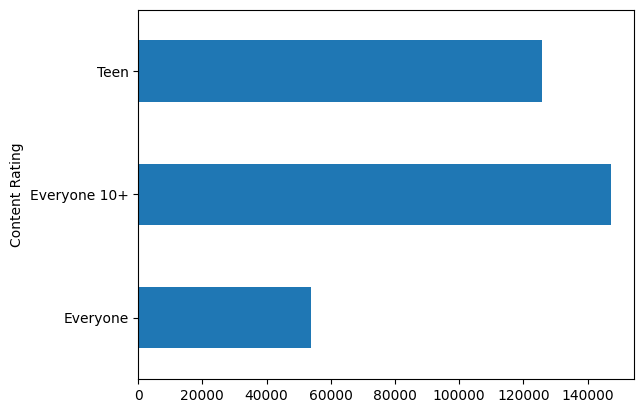

In [64]:
d2.plot(kind = 'barh')

In [65]:
d = df.pivot_table(index = 'Content Rating', 
 	columns = 'Type', 
 	values = 'Installs', 
 	aggfunc = 'mean')


<Axes: ylabel='Content Rating'>

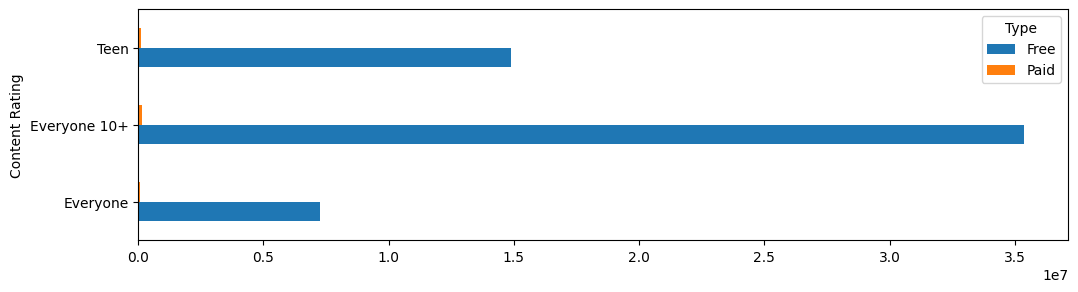

In [74]:
d.plot(kind = 'barh', figsize = (12, 3))

ПРАКТИКА